In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance

from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [25]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"   
font = cv2.FONT_HERSHEY_SIMPLEX 
font_scale = 0.5   
font_color = (0, 0, 255)  
font_thickness = 1 

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
# Display the image and window title should be 
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


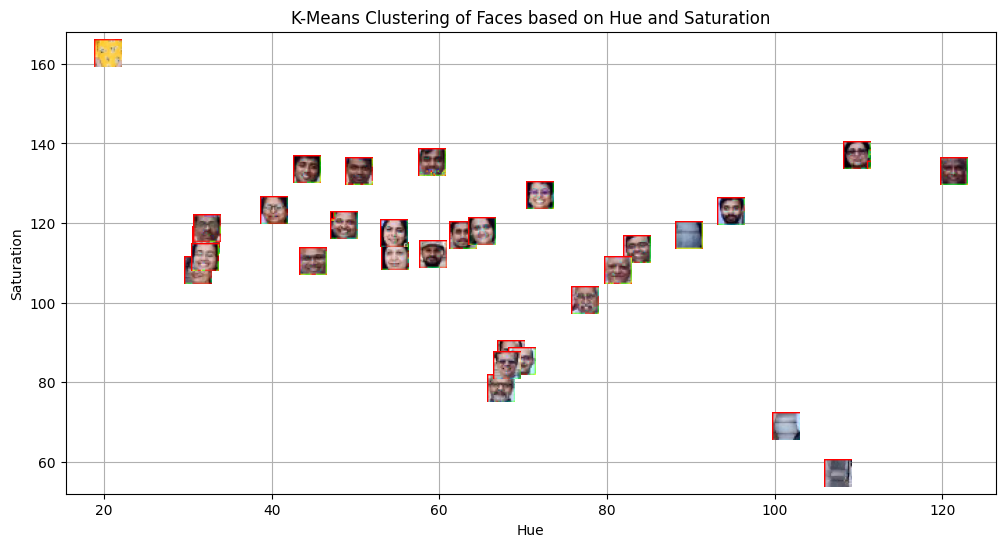

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#Face Detection

img = cv2.imread("plaksha_Faculty.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces_rect = face_cascade.detectMultiScale(
    gray_img, 1.1, 5, minSize=(25, 25))

for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, "Face", (x, y-5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 255), 1)

cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Feature Extraction

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y+h, x:x+w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Clustering 

if len(hue_saturation) > 0:
    centroids, labels = kmeans2(hue_saturation, 3, minit='points')
else:
    labels = []

# Plot

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(
        cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB)
    )
    ab = AnnotationBbox(
        im,
        (hue_saturation[i, 0], hue_saturation[i, 1]),
        frameon=False,
        pad=0
    )
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-Means Clustering of Faces based on Hue and Saturation")
plt.grid(True)
plt.show()


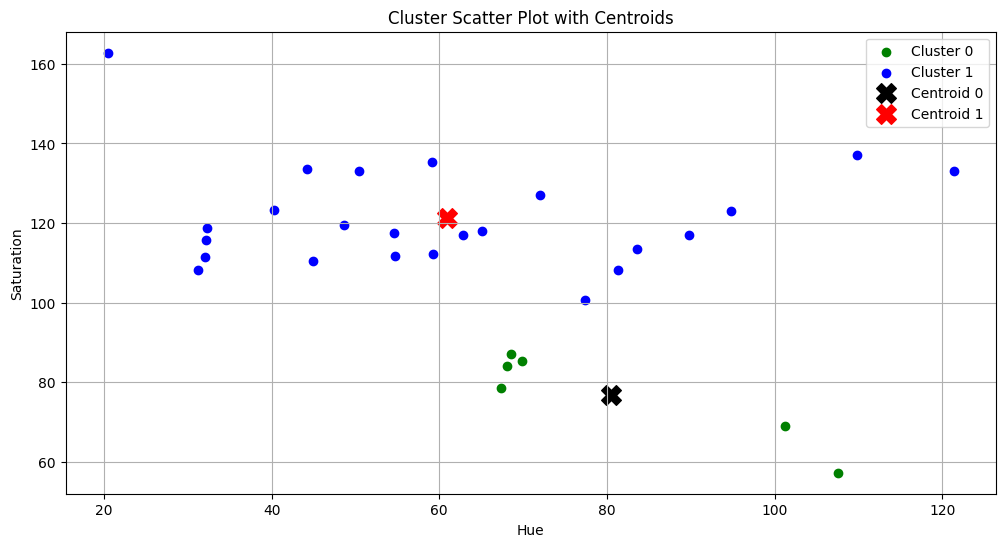

In [27]:
# Create an empty list to store legend labels
legend_labels = []

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if labels[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],
            c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],
            c='blue', label='Cluster 1')

# Calculate centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot centroids
plt.scatter(centroid_0[0], centroid_0[1],
            c='black', marker='X', s=200, label='Centroid 0')

plt.scatter(centroid_1[0], centroid_1[1],
            c='red', marker='X', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Scatter Plot with Centroids")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
## Read the class of the template image 
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(
    cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY),
    1.1, 5
)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


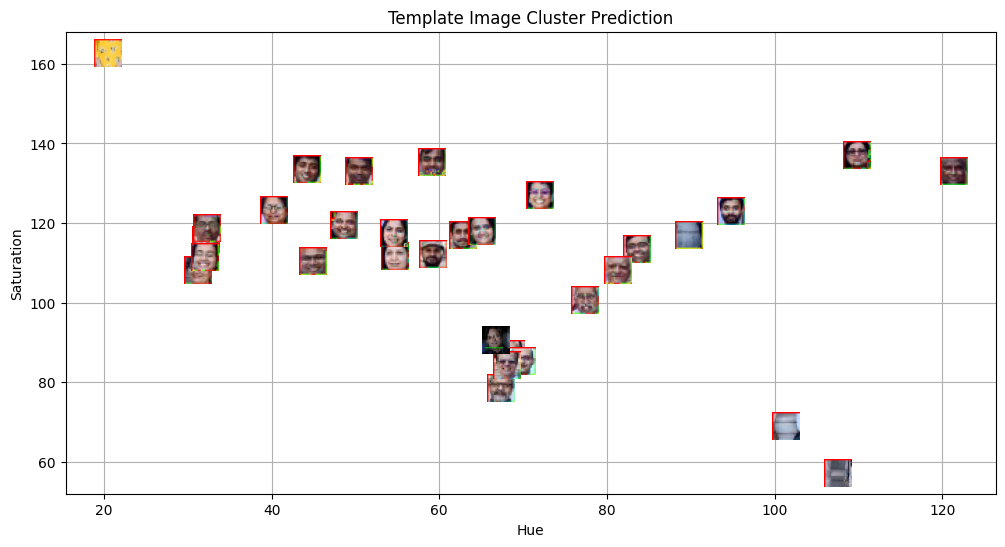

In [31]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label using nearest centroid
template_point = np.array([template_hue, template_saturation])
distances = [np.linalg.norm(template_point - c) for c in centroids]
template_label = np.argmin(distances)

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if labels[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot template image
color = 'red' if template_label == 0 else 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Image Cluster Prediction")
plt.grid(True)
plt.show()


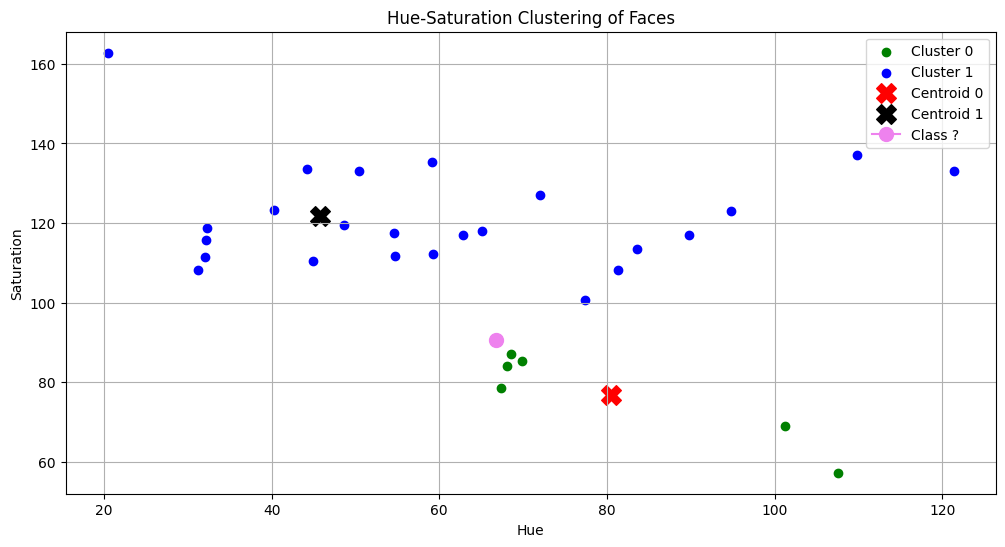

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

cluster_0_points = []
cluster_1_points = []

for i, (x, y, w, h) in enumerate(faces_rect):
    if labels[i] == 0:   # <-- FIXED HERE
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],
            c='green', label='Cluster 0')

plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],
            c='blue', label='Cluster 1')

# Use centroids returned from kmeans2 directly
plt.scatter(centroids[0][0], centroids[0][1],
            c='red', marker='X', s=200, label='Centroid 0')

plt.scatter(centroids[1][0], centroids[1][1],
            c='black', marker='X', s=200, label='Centroid 1')

plt.plot(template_hue, template_saturation,
         marker='o', c='violet', markersize=10, label='Class ?')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Hue-Saturation Clustering of Faces")
plt.legend()
plt.grid(True)
plt.show()
